<a href="https://colab.research.google.com/github/xiiiq/portfolio/blob/main/Redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

**Destacar que este caso práctico es la continuación de la última actividad realizada en la semana anterior. En la actividad de la semana anterior encontramos la mejor arquitectura para los datos que tenemos y ahora vmoas a realizar más experimentos jugando con los optimizers y el valor del learning rate.**

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset (California Housing Dataset) y desde 0 intentar llegar conseguir un modelo que tenga un buen rendimiento ajustándolo poco a poco como hemos visto en clase. Por lo que tendrmeos que entrerar distintas redes y comparar los resultados que obtengamos en cada experimento para ver cual es mejor.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma.

## <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los ejercicios que están definidos. En cada ejercicio está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.

## <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional son los últimos ejercicios donde tendréis que sacar una conclusión de si la red que habéis llegado a conseguir tiene un buen rendimiento.

## <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset California Housing con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Entender los resultados obtenidos en cada entrenamiento.

## <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter, aunque se agradecerá que el formato entregado se html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# <font color="#004D7F" size=5>California Housing Dataset</font>
En este notebook vamos a usar un dataset nuevo, el dataset es muy parecido al dataset del precio de las casas de boston. Esta vez vamos a utilizar un conjunto de datos que contienen información sobre el precio de las casas encontradas en un distrito de California. Las columnas son las siguientes:

- _longitude_: cuanto de al oeste está una casa; un valor más alto está más al oeste.
- _latitude_: cuanto de al norte está una casa; un valor más alto está más al norte.
- _housing_median_age_: edad media de una casa; un valor bajo es una casa más nueva.
- _total_rooms_: número total de habitaciones.
- _total_bedrooms_: número total de dormitorios.
- _population_: número total de personas que residen.
- _households_: número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda.
- _median_income_: ingreso medio de los hogares dentro de un bloque de casas (medido en decenas de miles de dólares).
- _ocean_proximity_: ubicación de la casa cerca del océano o mar.
- _median_house_value (**variables a predecir**)_: valor medio de la vivienda (medido en dólares).

Vamos a cargar los datos desde el fichero `housing.csv`:

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [ ]:
df.shape

(20433, 10)

Vamos a separar la variable objetivo del resto de variables (accedemos al campo value para que los datos sean de tipo _numpy array_ y se puedan usar como variable de entrada de nuestra red):

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [ ]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']].values
y = df[['median_house_value']].values

## 1. Establecer una función de coste adecuada a nuestro problema.

En este caso, como es un problema de regresión y los valores de nuestros datos son tan grandes, elegimos la función de coste `mean_absolute_percentage_error`, este error varía entre los valores 100 y 0 donde 100 es el pero error que podemos llegar a tener y 0 es el mejor error, por lo que en nuestros entrenamientos buscaremos un error más cercano a 0.

In [ ]:
actual_loss = 'mean_absolute_percentage_error'

## 2. Overfitting sobre un pequeño conjunto de datos.

Ahora, como ya hemos visto en clase vamos a encontrar una estructura de red que encaje con los datos que vamos a utilizar. Vamos a crear varias redes a ver que talfuncionan.

Para hacer entrenamientos rápidos y ver si la red se adapta a los datos vamos a usar solo un subconjunto de los datos, es decir usaremos 1000 datos y no usaremos conjunto de validación.

### <font color="#004D7F" size=4>Ejercicio 1</font>

Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
# Construimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Capa de entrada con la dimensión de los datos
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona sin función de activación
])

In [ ]:
# Compilamos la red
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red
history = model.fit(x[:1000], y[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 100.2954 - mean_absolute_percentage_error: 100.2954
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 99.8333 - mean_absolute_percentage_error: 99.8333
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 99.3004 - mean_absolute_percentage_error: 99.3004
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 98.6784 - mean_absolute_percentage_error: 98.6784
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 97.9130 - mean_absolute_percentage_error: 97.9130
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 96.8530 - mean_absolute_percentage_error: 96.8530
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 95.4146 - mean_absolute_percentage_error: 95.4146
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 93.6750 - mean_absolute_percentage_error: 93.6750
Epoch 9/30
32/32 [====

### <font color="#004D7F" size=4>Ejercicio 2</font>

Vamos a complicar un poco más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
# Construimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Capa de entrada con la dimensión de los datos
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona sin función de activación
])

In [ ]:
# Compilamos la red
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red
history = model.fit(x[:1000], y[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.9432 - mean_absolute_percentage_error: 99.9432
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 98.9359 - mean_absolute_percentage_error: 98.9359
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 93.1170 - mean_absolute_percentage_error: 93.1170
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 71.4290 - mean_absolute_percentage_error: 71.4290
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 46.3294 - mean_absolute_percentage_error: 46.3294
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 44.8291 - mean_absolute_percentage_error: 44.8291
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 44.4448 - mean_absolute_percentage_error: 44.4448
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 44.1564 - mean_absolute_percentage_error: 44.1564
Epoch 9/30
32/32 [======

### <font color="#004D7F" size=4>Ejercicio 3</font>

Vamos a complicar aun más la arquitectura de la red:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *6º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
# Construimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Capa de entrada con la dimensión de los datos
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona sin función de activación
])

In [ ]:
# Compilamos la red
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red
history = model.fit(x[:1000], y[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 2s 4ms/step - loss: 99.3933 - mean_absolute_percentage_error: 99.3933
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 91.9080 - mean_absolute_percentage_error: 91.9080
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 56.4011 - mean_absolute_percentage_error: 56.4011
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 44.8165 - mean_absolute_percentage_error: 44.8165
Epoch 5/30
32/32 [==============================] - 0s 4ms/step - loss: 44.2623 - mean_absolute_percentage_error: 44.2623
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 43.6252 - mean_absolute_percentage_error: 43.6252
Epoch 7/30
32/32 [==============================] - 0s 4ms/step - loss: 42.8788 - mean_absolute_percentage_error: 42.8788
Epoch 8/30
32/32 [==============================] - 0s 4ms/step - loss: 42.1521 - mean_absolute_percentage_error: 42.1521
Epoch 9/30
32/32 [======

### <font color="#004D7F" size=4>Ejercicio 4</font>

Vamos a hacer una última red con más capas y neuronas:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 1024 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 512 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 256 neuronas y función de activación *relu*.
        - *5º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *6º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *7º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *8º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *9º Capa*: capa de salida con una neurona sin función de activación.
        
    - Tipo de entrenamiento:
        - *Epochs*: 30
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
# Construimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Capa de entrada con la dimensión de los datos
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona sin función de activación
])

In [ ]:
# Compilamos la red
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red
history = model.fit(x[:1000], y[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 2s 17ms/step - loss: 74.9502 - mean_absolute_percentage_error: 74.9502
Epoch 2/30
32/32 [==============================] - 1s 21ms/step - loss: 44.6761 - mean_absolute_percentage_error: 44.6761
Epoch 3/30
32/32 [==============================] - 1s 25ms/step - loss: 41.5617 - mean_absolute_percentage_error: 41.5617
Epoch 4/30
32/32 [==============================] - 1s 18ms/step - loss: 36.8164 - mean_absolute_percentage_error: 36.8164
Epoch 5/30
32/32 [==============================] - 0s 15ms/step - loss: 29.3090 - mean_absolute_percentage_error: 29.3090
Epoch 6/30
32/32 [==============================] - 0s 15ms/step - loss: 28.0833 - mean_absolute_percentage_error: 28.0833
Epoch 7/30
32/32 [==============================] - 1s 16ms/step - loss: 28.0187 - mean_absolute_percentage_error: 28.0187
Epoch 8/30
32/32 [==============================] - 0s 15ms/step - loss: 25.9156 - mean_absolute_percentage_error: 25.9156
Epoch 9/30
32/32

### <font color="#004D7F" size=4>Ejercicio 5</font>
Compara los resultados obtenidos en cada una de las arquitecturas definidas y quédate con la mejor. **¿En qué experimento se obtiene los mejores resultados?**

La arquitectura elegida la usaremos en el caso práctico para seguir ajustando nuestro modelo y alcanzar un buen rendimiento.

Hemos probado si con un pequeño conjunto de datos nuestra red aprendía y era una buena arquitectura. En los 4 casos veíamos que es así. La función de pérdida va disminuyendo en los 4 ejercicios en cada epoch de entrenamiento, mostrándonos que el modelo está ajustando sus pesos para minimizar la diferencia entre los valores predichos y los valores reales del conjunto de datos de entrenamiento.

Hemos obtenido los siguientes resultados en la última etapa del entrenamiento en cada ejercicio:

```
- Modelo 1: 44.71 MAPE
- Modelo 2: 28.81 MAPE
- Modelo 3: 25.63 MAPE
- Modelo 4: 19.99 MAPE
```

En este caso, atendiendo a la loss y a la métrica utilizada (MAPE), nuestro mejor modelo sería el que hemos empleado en el "Ejercicio 4" ya que es el que muestra los valores más bajos de los modelos presentados.

## 3. Elegimos un Optimizer.

Hemos establecido Adam en los entrenamientos anteriores. Vamos a comprobarlo para el conjunto de validación como funciona y después probaremos a usar un optimizador SGD.

### <font color="#004D7F" size=4>Ejercicio 6</font>

Usa la mejor arquitectura y configuración de entrenamiento de los ejercicios anteriores y entrena con la siguiente configuración:

- Usa un `validation_split` de 0.2
- Utiliza todos los datos y no solo 1000.
- Usa 5 epochs en total.

In [ ]:
# Construimos la red del "Ejercicio 4" nuevamente
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Capa de entrada con la dimensión de los datos
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona sin función de activación
])

In [ ]:
# Compilamos la red
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red con la nueva configuración
history = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 11s 19ms/step - loss: 47.1833 - mean_absolute_percentage_error: 47.1833 - val_loss: 46.8983 - val_mean_absolute_percentage_error: 46.8983
Epoch 2/5
511/511 [==============================] - 10s 20ms/step - loss: 40.6034 - mean_absolute_percentage_error: 40.6034 - val_loss: 44.5112 - val_mean_absolute_percentage_error: 44.5112
Epoch 3/5
511/511 [==============================] - 11s 22ms/step - loss: 37.1186 - mean_absolute_percentage_error: 37.1186 - val_loss: 38.8808 - val_mean_absolute_percentage_error: 38.8808
Epoch 4/5
511/511 [==============================] - 9s 18ms/step - loss: 34.5064 - mean_absolute_percentage_error: 34.5064 - val_loss: 35.7490 - val_mean_absolute_percentage_error: 35.7490
Epoch 5/5
511/511 [==============================] - 9s 18ms/step - loss: 33.1874 - mean_absolute_percentage_error: 33.1874 - val_loss: 35.7748 - val_mean_absolute_percentage_error: 35.7748


### <font color="#004D7F" size=4>Ejercicio 7</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero usa un optimizador **SGD** en lugar de un Adam.

In [ ]:
# Compilamos la red con el optimizador SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red
history = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 9s 16ms/step - loss: 87.0331 - mean_absolute_percentage_error: 87.0331 - val_loss: 56.5812 - val_mean_absolute_percentage_error: 56.5812
Epoch 2/5
511/511 [==============================] - 7s 13ms/step - loss: 56.5113 - mean_absolute_percentage_error: 56.5113 - val_loss: 56.4642 - val_mean_absolute_percentage_error: 56.4642
Epoch 3/5
511/511 [==============================] - 7s 14ms/step - loss: 55.9142 - mean_absolute_percentage_error: 55.9142 - val_loss: 55.6040 - val_mean_absolute_percentage_error: 55.6040
Epoch 4/5
511/511 [==============================] - 7s 13ms/step - loss: 53.5268 - mean_absolute_percentage_error: 53.5268 - val_loss: 51.9309 - val_mean_absolute_percentage_error: 51.9309
Epoch 5/5
511/511 [==============================] - 8s 15ms/step - loss: 49.4893 - mean_absolute_percentage_error: 49.4893 - val_loss: 53.5672 - val_mean_absolute_percentage_error: 53.5672


### <font color="#004D7F" size=4>Ejercicio 8</font>

**¿Qué optimizador ha funcionado mejor?**

El optimizador que eligas tendrás que usarlo en los siguientes ejercicios.

Vemos que hemos obtenido mejores resultados con el optimizador Adam, porque ha logrado una pérdida y un MAPE más bajo que el optimizador SGD. Vemos los resultados:

```
Adam:
Loss: 33.18 ; MAPE: 33.18

SGD:
Loss: 49.48 ; MAPE: 44.48
```
Por lo que elegimos el optimizador Adam para los siguientes ejercicios.

## 4. Probar diferentes configuraciones con un número pequeño de epochs.

Vamos a realizar diferentes experimentos cambiando el learning rate de nuestro optimizador.

### <font color="#004D7F" size=4>Ejercicio 9</font>

Realiza un entrenamiento con la arquitectura y el optimizador que mejor te ha funcionado y utilizar un **learning rate de 0.1**.

In [ ]:
# Construimos la red del "Ejercicio 4"
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Capa de entrada con la dimensión de los datos
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona sin función de activación
])

In [ ]:
# Compilamos la red con el optimizador Adam y el nuevo learning rate de 0.1
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red con la nueva configuración
history = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 11s 18ms/step - loss: 125.2602 - mean_absolute_percentage_error: 125.2602 - val_loss: 48.1692 - val_mean_absolute_percentage_error: 48.1692
Epoch 2/5
511/511 [==============================] - 10s 19ms/step - loss: 44.7913 - mean_absolute_percentage_error: 44.7913 - val_loss: 46.8386 - val_mean_absolute_percentage_error: 46.8386
Epoch 3/5
511/511 [==============================] - 8s 16ms/step - loss: 42.4817 - mean_absolute_percentage_error: 42.4817 - val_loss: 43.1592 - val_mean_absolute_percentage_error: 43.1592
Epoch 4/5
511/511 [==============================] - 9s 18ms/step - loss: 40.1237 - mean_absolute_percentage_error: 40.1237 - val_loss: 38.0881 - val_mean_absolute_percentage_error: 38.0881
Epoch 5/5
511/511 [==============================] - 9s 18ms/step - loss: 39.8143 - mean_absolute_percentage_error: 39.8143 - val_loss: 45.2023 - val_mean_absolute_percentage_error: 45.2023


### <font color="#004D7F" size=4>Ejercicio 10</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero esta vez usa un **learning rate de 0.0001**.

In [ ]:
# Construimos la red del "Ejercicio 4" nuevamente
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Capa de entrada con la dimensión de los datos
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona sin función de activación
])

In [ ]:
# Compilamos la red con el optimizador Adam y el nuevo learning rate de 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red con la nueva configuración
history = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 37s 17ms/step - loss: 65.3867 - mean_absolute_percentage_error: 65.3867 - val_loss: 54.8509 - val_mean_absolute_percentage_error: 54.8509
Epoch 2/5
511/511 [==============================] - 9s 18ms/step - loss: 48.8486 - mean_absolute_percentage_error: 48.8486 - val_loss: 48.4279 - val_mean_absolute_percentage_error: 48.4279
Epoch 3/5
511/511 [==============================] - 9s 19ms/step - loss: 42.6522 - mean_absolute_percentage_error: 42.6522 - val_loss: 48.0700 - val_mean_absolute_percentage_error: 48.0700
Epoch 4/5
511/511 [==============================] - 8s 17ms/step - loss: 41.9454 - mean_absolute_percentage_error: 41.9454 - val_loss: 47.4616 - val_mean_absolute_percentage_error: 47.4616
Epoch 5/5
511/511 [==============================] - 9s 17ms/step - loss: 41.3119 - mean_absolute_percentage_error: 41.3119 - val_loss: 46.7306 - val_mean_absolute_percentage_error: 46.7306


## 5. Ajuste refinado de los parámetros con más epochs. [Opcional]

Por último vamos a realizar un entrenamiento más largo para ver hasta donde llega el rendimiento de nuestro modelo.

### <font color="#004D7F" size=4>Ejercicio 11 [Opcional]</font>

**¿Entre los entrenamientos usando learning rates igual a 0.001, 0.1 y 0.0001 cual ha funcionado mejor?**

Con el experimento que mejor haya funcionado haz un entrenamiento usando 30 epochs y ver que tal funciona el entrenamiento con más epochs.

In [ ]:
# Utilizamos el primer learning rate, el de 0.001, es el que ha funcionado mejor
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=actual_loss,
              metrics=[actual_loss])

In [ ]:
# Entrenamos la red
history = model.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 11s 19ms/step - loss: 47.4295 - mean_absolute_percentage_error: 47.4295 - val_loss: 47.2143 - val_mean_absolute_percentage_error: 47.2143
Epoch 2/30
511/511 [==============================] - 9s 17ms/step - loss: 40.6995 - mean_absolute_percentage_error: 40.6995 - val_loss: 42.9561 - val_mean_absolute_percentage_error: 42.9561
Epoch 3/30
511/511 [==============================] - 9s 17ms/step - loss: 37.5080 - mean_absolute_percentage_error: 37.5080 - val_loss: 38.2923 - val_mean_absolute_percentage_error: 38.2923
Epoch 4/30
511/511 [==============================] - 10s 19ms/step - loss: 34.9269 - mean_absolute_percentage_error: 34.9269 - val_loss: 36.8488 - val_mean_absolute_percentage_error: 36.8488
Epoch 5/30
511/511 [==============================] - 8s 16ms/step - loss: 33.2950 - mean_absolute_percentage_error: 33.2950 - val_loss: 36.3365 - val_mean_absolute_percentage_error: 36.3365
Epoch 6/30
511/511 [=======================

### <font color="#004D7F" size=4>Ejercicio 12 [Opcional]</font>

Muestra en una gráfica como ha evolucionado el entrenamiento.

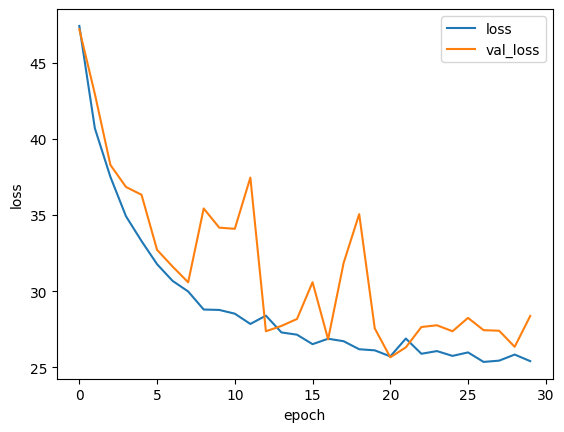

In [ ]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

Vemos que al comienzo del entrenamiento tanto la función de pérdida del conjunto de entrenamiento como el de validación bajan rápidamente en las primeras epochs. La función de pérdida del entrenamiento baja paulatinamente hasta la última epoch y por lo general, hay un poco más de error en el conjunto de validación etapa a etapa.

A partir de la etapa 6 vemos que los valores de la función de pérdida de los datos de validación no bajan de la misma forma que los de entrenamiento. Y en algunos casos, tenemos grandes diferencias entre ambos resultados (significativamente mayores los de validación). El modelo no ha ajustado sus pesos correctamente en esos momentos y no hace predicciones precisas en el conjunto de validación. Poco a poco los pesos se van ajustando y el modelo mejora sus predicciones en ambos conjuntos.

Al final del entrenamiento, hemos obtenido un error mayor en la validación que en el entrenamiento. Podríamos decir que nuestro modelo se ha ido ajustando bien a los datos de entrenamiento pero no generaliza tan bien para los datos de validación. Estaríamos sufriendo sobreajuste de los datos de entrenamiento. Para mejorar el rendimiento del modelo, podríamos probar a aplicar técnicas de regularización como el dropout (eliminando algunas neuronas durante el entrenamiento) y otro tipo de soluciones, como por ejemplo, reajustar nuevamente nuestra estructura o utilizar más datos, entre otros.